### step1: Import libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### step 2:Load the dataset

In [65]:
df=pd.read_csv('Mall_Customers.csv')
df.head()
#Age is important feature than gender and cutomerID 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step3 Data Preprocessing

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
#checking missing values
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [68]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [69]:
#drop the column which is not required for analysis
df.drop(columns=["CustomerID","Gender"], axis=1, inplace=True)


### STEP4:EDA

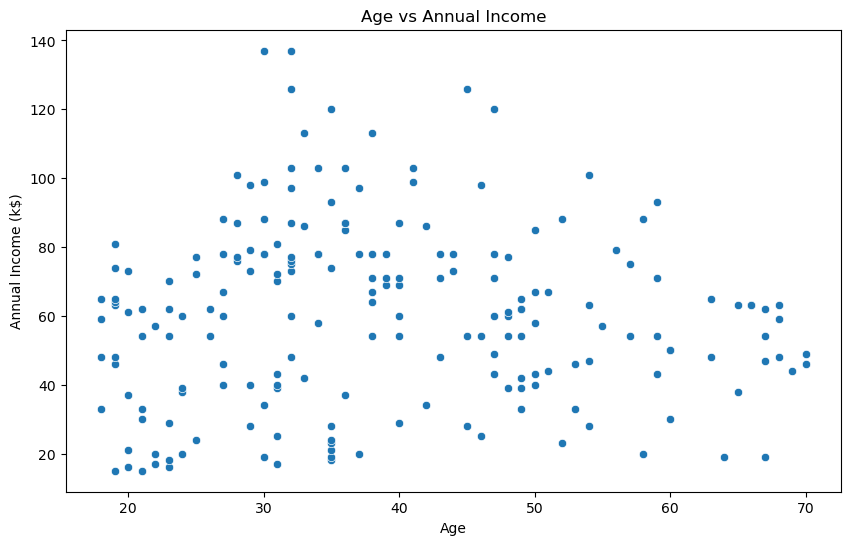

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

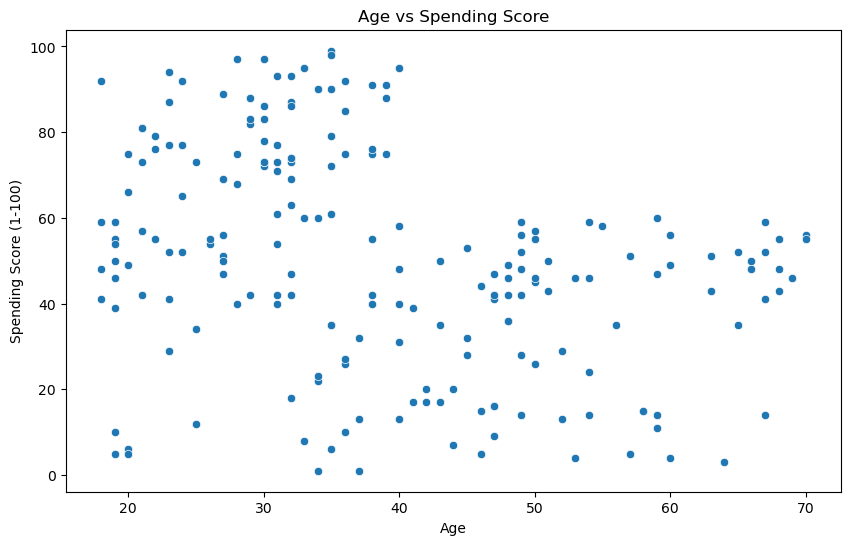

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [72]:
#Feature Engineering

#Check which distribution graph if its normal distribution use normalization
#if standard distribution use standardization

In [73]:
#Find the skewness of the data
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [74]:
print("Skewness of Age:",df["Age"].skew())
print("Skewness of Annual Income (k$):",df["Annual Income (k$)"].skew())
print("Skewness of Spending Score (1-100):",df["Spending Score (1-100)"].skew())


Skewness of Age: 0.48556885096681657
Skewness of Annual Income (k$): 0.3218425498619055
Skewness of Spending Score (1-100): -0.047220201374263374


### Step5:Feature Engineering

In [75]:
#display skewness name normal,right skewed, left skewed
def skeweness_name(skewness):
    if skewness > 0:
        return "Positively Skewed"
    elif skewness < 0:
        return "Negatively Skewed"
    else:
        return "Symmetric/Normal Distribution"

print("Skewness of Age:",
      skeweness_name(df["Age"].skew()))

print("Skewness of Annual Income (k$):",
      skeweness_name(df["Annual Income (k$)"].skew()))

print("Skewness of Spending Score (1-100):",
      skeweness_name(df["Spending Score (1-100)"].skew()))


Skewness of Age: Positively Skewed
Skewness of Annual Income (k$): Positively Skewed
Skewness of Spending Score (1-100): Negatively Skewed


In [76]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Step6:Train K-Mean model

In [77]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
df["Cluster"]=kmeans.labels_
df.head()

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

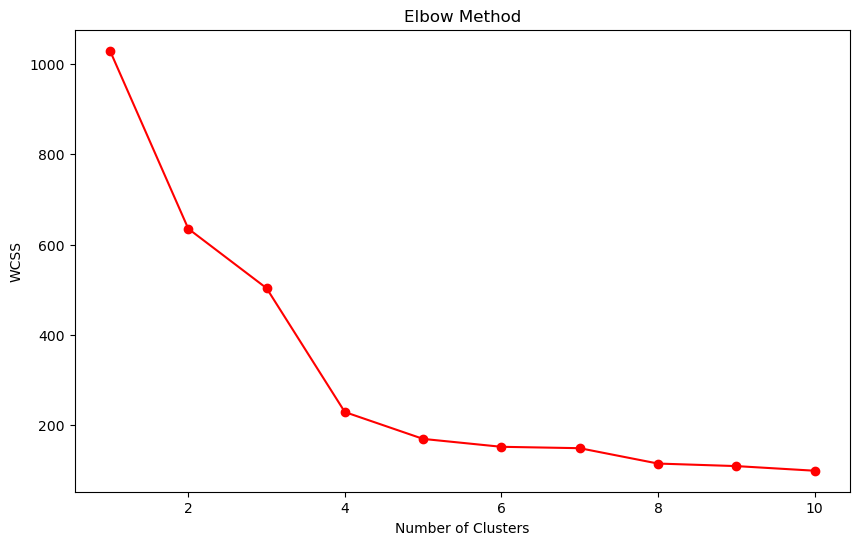

In [78]:
#check with Elbow method

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [79]:
df["Cluster"].value_counts()


Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

Text(0, 0.5, 'Annual Income(k$)')

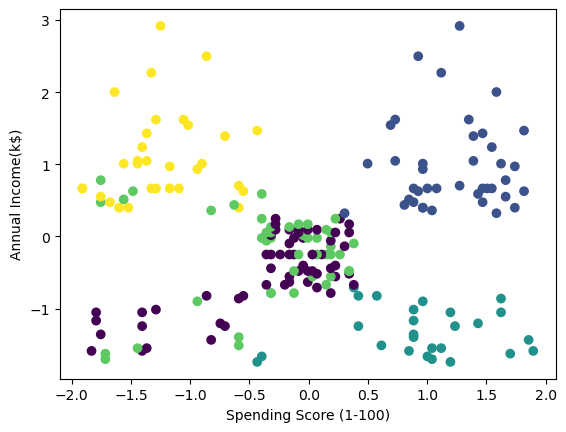

In [80]:
#diaply clusters


plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"],c=df["Cluster"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income(k$)")



In [81]:
#Save the file

df.to_csv("Mall_Customers_Clustered.csv",index=False)

In [82]:
X=df.drop(columns=["Cluster"],axis=1)
y=df["Cluster"]

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Predicted Clusters:",y_pred)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))




Predicted Clusters: [3 2 0 4 4 3 3 4 4 2 0 4 1 3 4 1 0 4 0 3 3 3 4 3 3 0 3 0 1 3 2 0 0 3 4 0 1
 1 4 0]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 10]]
Accuracy Score: 1.0


In [84]:
import joblib

joblib.dump(model, "knn_model.pkl")



['knn_model.pkl']